<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui&nbsp;</span><br/>
___

This tutorial is intended for people who want to use the Genop optimizer. Genop (**Gen**etic **op**timizer) is a Python package implementing the Genetic Algorithm (GA) for a mono-objective minimization. GA is a derivative-free optimizer.  This metaheuristic mimics the natural evolution with the repeated application of operators (selection, mutation, crossover, etc.) in order to evolve a set of solutions towards the optimality. People interested in this class of algorithms may refer to [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm) or [Genetic Programming](http://geneticprogramming.com/) for more information.

Although Genop was primarly designed for the Telemac system, it is user-friendly and open to other fields of applications where derivatives are difficult to assess. Indeed, the software claims to be easy to figure out, efficient to run and supported.


# Genop as a Python package

Genop can be imported as a Python v2 package. It is located with the Telemac distribution in the sub-folder:

$HOMETEL/scripts/python3/TelApy/tools

In [1]:
# Changing of directory
import os
HOMETEL = os.environ.get('HOMETEL')
if HOMETEL:
    os.chdir(HOMETEL + '/scripts/python3/telapy/tools')
else:
    raise Exception('Unable to change of directory: \
    please check the HOMETEL value.')

Note: In order to import the package from any other path, one can change the PYTHONPATH environment variable.

Once the Genop package is correctly located, it can be imported:

In [2]:
from telapy.tools.genop import genop

Some basic information on Genop package can be obtained with:

In [3]:
help(genop)

Help on module telapy.tools.genop.genop in telapy.tools.genop:

NAME
    telapy.tools.genop.genop - A genetic algorithm optimizer (minimizer) in Python

DESCRIPTION
    Author(s): Fabrice Zaoui
    
    Copyright EDF 2016-2017
    
    Comments : adapted from the original algorithm of Scilab module 'optim_ga'

CLASSES
    builtins.object
        Genop
    
    class Genop(builtins.object)
     |  Genop(popsize=25, pbcross=0.7, pbmut=0.1)
     |  
     |  The base class for the Genetic Opimization
     |  
     |  Methods defined here:
     |  
     |  __init__(self, popsize=25, pbcross=0.7, pbmut=0.1)
     |      Initialize some algorithmic parameters to default values
     |      :return: a new object from Genop
     |  
     |  initialize(self, func, nvar, bounds)
     |      Description of the minimization problem
     |      :param 'f': the name of the python function where the cost function
     |          is implemented (type: str)
     |      :param 'n': the number of optimizati

and attributes reachable from it with:

In [4]:
dir(genop)

['Genop',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cost',
 'crossover',
 'elitist',
 'genpop',
 'mutation',
 'np',
 'printinfo',
 'selection',
 'updatecost',
 'validate']

# Cost function

The problem under consideration is formulated as a mathematical optimization seeking to minimize a cost function. With Genop the user has to define the cost function as a Python function taking as argument the (numpy array) vector of variables and returning the corresponding cost function value.

For example, in the parent directory of Genop some test functions are defined in the file 'simul.py' 

In [5]:
import telapy.tools.simul as simul

In [6]:
%%bash
cat simul.py

# -*- coding: utf-8 -*-
"""
Definition of the cost function for 'genop' optimizer

Author(s) : Fabrice Zaoui

Copyright EDF 2016-2017

:param 'x': array of optimization variables
:return: value of the cost function
"""
import numpy as np


# user function
def sim_telemac(varx):
    """
    The cost function to be written by user
    """
    val = varx
    return val


# test function
def rosenbrock(varx):
    """
    https://en.wikipedia.org/wiki/Rosenbrock_function
    """
    val = (1.-varx[0])**2+100.*(varx[1]-varx[0]**2)**2
    return val


# test function
def maccormick(varx):
    """
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    """
    val = np.sin(varx[0]+varx[1])+(varx[0]-varx[1])**2 - \
        1.5*varx[0]+2.5*varx[1]+1.
    return val


# test function
def easom(varx):
    """
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    """
    val = -np.cos(varx[0])*np.cos(varx[1]) * \
        np.exp(-((varx[0]-np.pi)**2+(varx[1]-np.pi)**2))

Six analytical functions are defined in this test file. They can be all optimized with Genop in one shot using the script 'test_genop.py':

In [7]:
%%bash
python3 test_genop.py

-----  genop optimization -----
-------------------------------
|     iter     |     Cost     |
-------------------------------
        1       2.270541e-01
        2       2.270541e-01
        3       3.601826e-02
        4       3.601826e-02
        5       3.601826e-02
        6       3.601826e-02
        7       3.601826e-02
        8       3.601826e-02
        9       5.091069e-03
       10       5.091069e-03
       11       2.711417e-03
       12       2.440478e-03
       13       2.379047e-03
       14       2.379047e-03
       15       2.379047e-03
       16       1.025262e-03
       17       1.025262e-03
       18       1.025262e-03
       19       1.024390e-03
       20       1.024390e-03
       21       1.024390e-03
       22       1.024390e-03
       23       4.717037e-04
       24       6.904842e-05
       25       1.036332e-05
       26       5.951595e-06
       27       6.431157e-07
       28       6.431157e-07
       29       1.851941e-07
       30       2.344013e-08
--

......
----------------------------------------------------------------------
Ran 6 tests in 6.418s

OK


# Problem definition with Genop

Suppose that the problem concerns the minimization of the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function):

$$ F(x_1,x_2) = (1-x_1)^2 + 100 \times (x_2-x_1^2)^2$$ 

This functions of two variables has a global optimum at $$(x_1,x_2)=(1,1)$$ where $$F_{opt}(1,1)=0$$

As the function is already implemented in 'simul.py' the definition of the Genop problem will be:

In [8]:
import numpy as np

# pointer to the function
f = simul.rosenbrock
# number of variables
n = 2
# lower and upper bounds for variable (optimizing in the range [-5., 5.])
bounds = np.zeros((n, 2))
bounds[0, 0] = -5.
bounds[0, 1] = 5.
bounds[1, 0] = -5.
bounds[1, 1] = 5.
# instantiation of a Genop problem with default values for parameters
mypb = genop.Genop()
# initialization of the problem for Genop
error = mypb.initialize(f, n, bounds)
if error:
    raise Exception('Unable to initialize Genop')

# Optimizing with Genop

The Genop minimization with default valuesis straightforward: 

In [9]:
fcost, xopt = mypb.optimize()

-----  genop optimization -----
-------------------------------
|     iter     |     Cost     |
-------------------------------
        1       4.922174e-01
        2       7.413412e-02
        3       7.413412e-02
        4       7.413412e-02
        5       1.697566e-02
        6       1.697566e-02
        7       1.697566e-02
        8       1.697566e-02
        9       1.697566e-02
       10       1.697566e-02
-------------------------------------

--> Maximum number of iterations: 10
-------------------------------------

--> Number of simulations: 468
-------------------------------------

--> Best solution found:
	 * cost function: 1.697566e-02
	 * solution:	
		0: 1.1302673808062937			1: 1.2772580560682112
-------------------------------------



Genop returns all the values of optimal cost functions *fcost* and associated variables *xopt* throughout the minimization process.

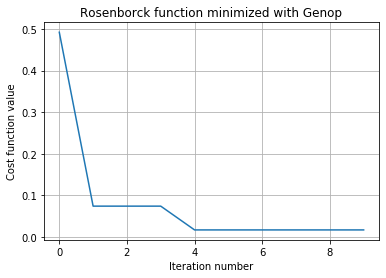

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(fcost)
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.title('Rosenborck function minimized with Genop')
plt.show()

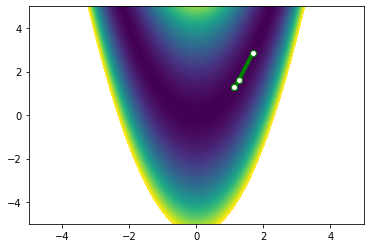

In [11]:
x1, x2 = np.meshgrid(np.linspace(-5.,5.,201),np.linspace(-5.,5.,201))
plt.contourf(x1, x2, simul.rosenbrock([x1,x2]), np.linspace(0.,3000.,200))
plt.plot(*zip(*xopt), lw=4, color="green", marker="o", markerfacecolor="white")
plt.show()

## Default optimization parameters

Usefull parameters for the optimization process can be changed by the user with the instantiation of a new Genop object:

mypb = genop.Genop(popsize=20, pbcross=0.8, pbmut=0.05)

where:
* popsize is the size of the population
* pbcross is the probability crossover
* pbmut is the probability mutation

It is also possible to change the maximum number of generations with the call to the optimize method:

fcost, xopt = mypb.optimize(nbgen=30)

## Parallelism

Althought GA requires many calls to cost functions assessment, it can be easily parallelised since each call is independant from other.

Genop implements the *multiprocessing* Python package for this purpose.

The number of processors to be used is indicated when calling the optimize method:

fcost, xopt = mypb.optimize(nproc=2)